###                                                                                         Name: Sharon Laurance Muthipeedika 
###                                                                                         Matriculation No: 312486

## Exercise 3: Implementing Coordinate Descent

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp,sqrt

In [2]:
df=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 6\\winequality-red.csv",delimiter=';')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df2_train=df.sample(frac=0.8,random_state=3116) #random state is a seed value
df2_test=df.drop(df2_train.index)
print(np.shape(df2_train))
print(np.shape(df2_test))

(1279, 12)
(320, 12)


In [5]:
X=df2_train.iloc[:,0:11]
y=df2_train.iloc[:,11:12]
X_test=df2_test.iloc[:,0:11]
y_test=df2_test.iloc[:,11:12]

In [6]:
m=len(y)
m1=len(y_test)
# X = np.hstack((np.ones([m,1]), X)) # Append the bias term (field containing all ones) to X.
X=np.array(X)
y = np.array(y).reshape(-1,1) 
X_test= np.hstack((np.ones([m1,1]), X_test))
y_test=np.array(y_test).reshape(-1,1) 

print(np.shape(X))
print(np.shape(y))

(1279, 11)
(1279, 1)


### 1. Coordinate Descent.

In [7]:
def minimise_CD(beta,imax,epsilon):
    beta_arr=np.empty((105,11,1))
    m,n=X.shape
    count=0
    l=loss_function(X,y,beta)
    for i in range(imax):
        
        for j in range(n-1):
            X_m=np.delete(X, j, axis=1)
            beta_m=np.delete(beta,j,axis=0)
            A= np.dot((y-np.dot(X_m,beta_m)).T,X[:,j])
            B=np.dot(X[:,j].T,X[:,j])
            C=A/B
            beta[j]= C
        beta_arr[i,0:11]=beta
        l_old=l
        l=loss_function(X,y,beta)
        if (abs(l_old-l)<epsilon):
            return beta_arr
        elif(i==imax):
            return 99999999
        
def loss_function(X,y,beta):
    A=y-np.dot(X,beta)
    Function=np.dot(A.T,A)
    
    return Function.item()

In [8]:
beta=np.zeros((11,1))
imax=1000
epsilon=0.1
beta_arr=minimise_CD(beta,imax,epsilon)
np.shape(beta_arr)
arr1=beta_arr.reshape(105,11)

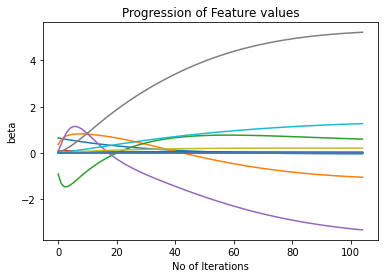

In [9]:
plt.plot(arr1)
plt.title('Progression of Feature values')
plt.xlabel('No of Iterations')
plt.ylabel('beta')
plt.show()

### 2.Coordinate Descent with L1 Regularization

In [10]:
def minimise_CD_lasso(beta,imax,epsilon,lambda1):
    beta_arr=np.empty((138,11,1))
    m,n=X.shape
    count=0
    l=loss_function(X,y,beta,lambda1)
    for i in range(imax):
        
        for j in range(n-1):
            X_m=np.delete(X, j, axis=1)
            beta_m=np.delete(beta,j,axis=0)
            A= np.dot((y-np.dot(X_m,beta_m)).T,X[:,j])
            B=np.dot(X[:,j].T,X[:,j])
            C=A/B
            second_term= (0.5*lambda1)/B
            beta[j]= soft(C,second_term)
#         print(beta)
        beta_arr[i,0:11]=beta
        count+=1
        l_old=l
        l=loss_function(X,y,beta,lambda1)
        if (abs(l_old-l)<epsilon):
            return beta_arr
        elif(i==imax):
            return 99999999
        
def loss_function(X,y,beta,lambda1):
    A=y-np.dot(X,beta)
    Function=np.dot(A.T,A)
    regularization_term=lambda1*np.sum(beta)
    return Function.item()+regularization_term

def soft(a,b):
    
    if (a>b):
        return a-b
    elif (abs(a)<=b):
        return 0
    elif(a<-b):
        return a+b

In [11]:
beta=np.zeros((11,1))
imax=1000
epsilon=0.1
lambda1=10
beta_arr=minimise_CD_lasso(beta,imax,epsilon,lambda1)
beta_arr
arr2=beta_arr.reshape(138,11)

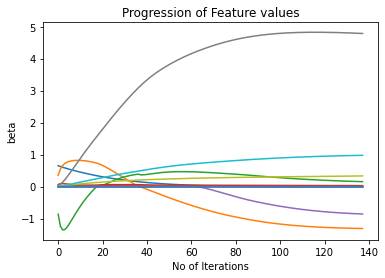

In [12]:
plt.plot(arr2)
plt.title('Progression of Feature values')
plt.xlabel('No of Iterations')
plt.ylabel('beta')
plt.show()

### Task C: Comparison


#### Main Difference is the number of Iterations it converges. The predicted values also changes during lasso. And the rane can be observed from the graph.

#### Coordinate Descent can be used even when there is no closed form solution available for objective function(Eg Lasso Regression). We minimise one coordinate while keeping all the others fixed.Also coordinate descent has no step-size hyper parameter to tune.

#### References
 - https://www.ismll.uni-hildesheim.de/lehre/ml-20w/script/ml-05-A4-high-dimensional-data.pdf